## Homework #2
Due 9/23/2024

## Problem 1
Define a function to implement the peak-signal-to-noise calculation as described in lecture 4.  

Note: In python functions have the form:

PSNR between the original and filtered image: 30.385348108002773 dB


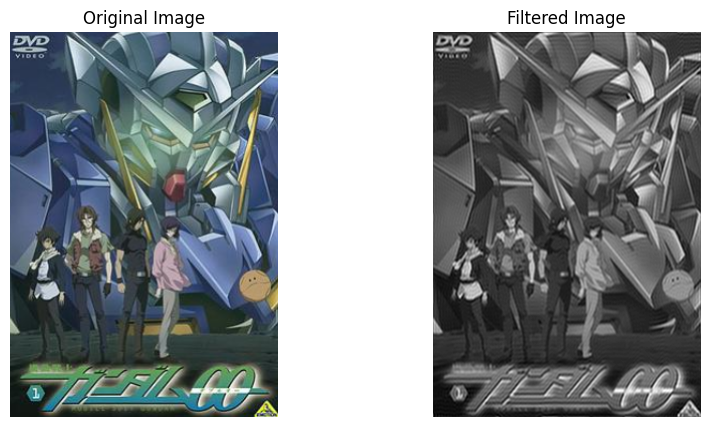

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
def calculate_psnr(image1, image2):
    # Read the images
    
    
    # Check if the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    # Convert images to float64 for calculation
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    
    # Calculate MSE
    mse = np.mean((image1 - image2) ** 2)
    
    # Handle the case where MSE is zero (identical images)
    if mse == 0:
        return float('inf')
    
    # Calculate PSNR
    max_pixel_value = 255.0  # Assuming 8-bit images
    pSNR = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    
    return pSNR


def apply_low_pass_filter(image, cutoff_fraction=1/3):
    # Convert the image to grayscale for simplicity
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get image dimensions
    rows, cols = gray_image.shape

    # Perform Fourier transform
    dft = np.fft.fft2(gray_image)
    dft_shift = np.fft.fftshift(dft)

    # Create a low-pass filter (top-hat binary window)
    crow, ccol = rows // 2, cols // 2
    cutoff = int(min(rows, cols) * cutoff_fraction)
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1

    # Apply the filter to the Fourier transform of the image
    filtered_dft = dft_shift * mask

    # Perform the inverse Fourier transform to get the filtered image
    f_ishift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)

    return filtered_image





    
# Read the image
image = cv2.imread('Data/1.png')



# Apply the low-pass filter
filtered_image = apply_low_pass_filter(image)

# Calculate PSNR between the original and filtered images
psnr_value = calculate_psnr(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), filtered_image)
print(f"PSNR between the original and filtered image: {psnr_value} dB")

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()



## Problem 2
* a) Implement a spatial frequency low-pass filter at 1/3 the Nyquist frequency of the image using a top-hat window (e.g. binary 0/1)
* b) Calculate the peak-SNR comparing the two images
* c) Use any image you like.  Put the image in the data folder for this repo 

## Problem 3
Implement a similar low-pass filter as problem 2 (1/3 the Nyquist) in the spatial domain as a kernel convolution (e.g. using the sinc function definitions in lecture 5).  Use a top-hat window (e.g. without worrying about tapering the edges).  Use the same image you used in problem 2. 

PSNR between the original and filtered image: 26.701992698822462 dB


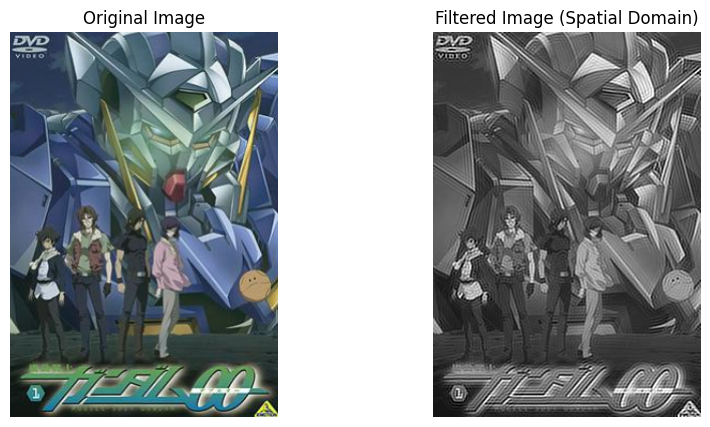

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_psnr(image1, image2):
    # Check if the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    # Convert images to float64 for calculation
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    
    # Calculate MSE
    mse = np.mean((image1 - image2) ** 2)
    
    # Handle the case where MSE is zero (identical images)
    if mse == 0:
        return float('inf')
    
    # Calculate PSNR
    max_pixel_value = 255.0  # Assuming 8-bit images
    psnr = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    
    return psnr

def sinc_filter(kernel_size, cutoff_fraction):
    """
    Create a 2D sinc low-pass filter kernel.
    Args:
        kernel_size (int): Size of the kernel (must be an odd number).
        cutoff_fraction (float): Cutoff frequency as a fraction of the Nyquist frequency (0 < cutoff_fraction < 0.5).
    Returns:
        np.ndarray: 2D filter kernel.
    """
    # Create a grid of (x, y) coordinates
    x = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    y = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    x, y = np.meshgrid(x, y)
    
    # Compute the radius
    r = np.sqrt(x**2 + y**2) + 1e-8  # Avoid division by zero

    # Calculate the sinc function
    sinc_func = 2 * cutoff_fraction * np.sinc(2 * cutoff_fraction * r)

    # Apply a top-hat window (binary 0/1 window)
    mask = (r <= kernel_size // 2).astype(float)  # Create a circular top-hat window
    sinc_func *= mask

    # Normalize the kernel
    kernel = sinc_func / np.sum(sinc_func)
    
    return kernel

def apply_low_pass_filter(image, cutoff_fraction=1/3):
    # Convert the image to grayscale for simplicity
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create the sinc low-pass filter kernel
    kernel_size = 21  # Kernel size; should be an odd number
    kernel = sinc_filter(kernel_size, cutoff_fraction)

    # Apply the filter to the image using 2D convolution
    filtered_image = cv2.filter2D(gray_image, -1, kernel)

    return filtered_image


image_path = 'Data/1.png' 
    
# Read the image
image = cv2.imread(image_path)


# Apply the low-pass filter
filtered_image = apply_low_pass_filter(image)

# Calculate PSNR between the original and filtered images
psnr_value = calculate_psnr(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), filtered_image)
print(f"PSNR between the original and filtered image: {psnr_value} dB")

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Spatial Domain)')
plt.axis('off')

plt.show()

## Problem 4
Define a function to implement a mean smoothing kernel filter.  

[ECE1390]
* As an input to your function, allow the user to select between a arithmatic, geometric, or harmonic mean
* Assume a fixed 3x3 binary morphological kernel 

[ECE 2690]
* As an input to your function, allow the user to select between a arithmatic, geometric, harmonic mean, or contraharmonic mean ("m" should be an input parameter)
* Design your function to allow any arbitary binary morphological kernel 

In [19]:
import numpy as np
import cv2

def apply_mean_filter(image, kernel, m, q=1.5):
    """
    Apply a mean filter to the image using an arbitrary binary morphological kernel.

    Parameters:
        image (np.ndarray): Input grayscale image.
        kernel (np.ndarray): Binary morphological kernel (e.g., 3x3 array).
        m (str): Type of mean filter ('arithmetic', 'geometric', 'harmonic', 'contraharmonic').
        q (float): Parameter for contraharmonic mean (only used when m is 'contraharmonic').

    Returns:
        np.ndarray: Filtered image.
    """
    # Get the dimensions of the image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Create an output image with the same size as the input
    filtered_image = np.zeros_like(image, dtype=np.float64)

    # Pad the image to handle borders
    pad_y, pad_x = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)

    # Iterate through the image
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            
            # Apply the kernel
            region_values = region[kernel == 1]  # Only consider pixels where the kernel is 1

            if len(region_values) == 0:
                continue  # Skip if no valid pixels

            # Apply the selected mean filter
            if m == 'arithmetic':
                filtered_image[i, j] = np.mean(region_values)
            elif m == 'geometric':
                filtered_image[i, j] = np.prod(region_values) ** (1 / len(region_values))
            elif m == 'harmonic':
                filtered_image[i, j] = len(region_values) / np.sum(1.0 / region_values)
            elif m == 'contraharmonic':
                numerator = np.sum(region_values ** (q + 1))
                denominator = np.sum(region_values ** q)
                filtered_image[i, j] = numerator / denominator if denominator != 0 else 0
            else:
                raise ValueError("Invalid filter type. Choose from 'arithmetic', 'geometric', 'harmonic', 'contraharmonic'.")

    # Clip values to valid range and convert to uint8
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    
    return filtered_image


image_path = 'Data/1.png'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]], dtype=np.uint8)

# 应用滤波
filtered_image = apply_mean_filter(image, kernel, m='harmonic')

# 显示结果
cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Administrater\AppData\Local\Temp\ipykernel_16440\3370570324.py:46: RuntimeWarning: divide by zero encountered in divide
  filtered_image[i, j] = len(region_values) / np.sum(1.0 / region_values)


## Problem 5 [ECE 2390 only]
Define a function to compute the discrete cosine transform of an image.  Include code to pad the image appropriately. The equation for the DCT was given in lecture 4  

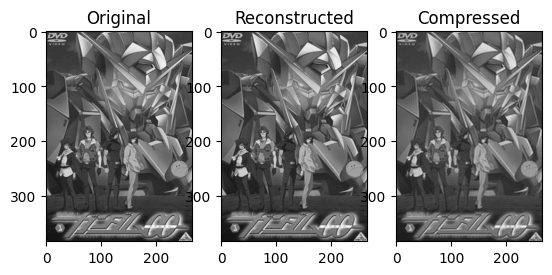

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def pad_image(img):
   
    old_height, old_width = img.shape
    new_height = next_power_of_2(old_height)
    new_width = next_power_of_2(old_width)

    delta_h = new_height - old_height
    delta_w = new_width - old_width

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    return padded_img, (top, bottom, left, right)

def remove_padding(img, pad_info):
  
    top, bottom, left, right = pad_info
    return img[top:img.shape[0] - bottom, left:img.shape[1] - right]

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

def apply_dct(img, inverse=False):
    
    img_padded, pad_info = pad_image(img)
    img_padded = np.float32(img_padded)

    if inverse:
        return cv2.idct(img_padded), pad_info
    else:
        return cv2.dct(img_padded), pad_info

def normalize_image(img):
   
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_norm)


image_path = 'Data/1.png'  
lena_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


lena_img = lena_img.astype(np.float64)

# 执行DCT
lena_dct, pad_info = apply_dct(lena_img)


lena_dct_compr = lena_dct.copy()
lena_dct_compr[int(lena_dct.shape[0]/2):, :] = 0
lena_dct_compr[:, int(lena_dct.shape[1]/2):] = 0

    
lena_compr_padded, _ = apply_dct(lena_dct_compr, inverse=True)
lena_full_padded, _ = apply_dct(lena_dct, inverse=True)


lena_compr = remove_padding(lena_compr_padded, pad_info)
lena_full = remove_padding(lena_full_padded, pad_info)

lena_compr_norm = normalize_image(lena_compr)
lena_full_norm = normalize_image(lena_full)

    
plt.subplot(131); plt.imshow(lena_img, cmap='gray'); plt.title('Original')
plt.subplot(132); plt.imshow(lena_full_norm, cmap='gray'); plt.title('Reconstructed')
plt.subplot(133); plt.imshow(lena_compr_norm, cmap='gray'); plt.title('Compressed')
plt.show()
